In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

Load data and plot.

In [2]:
# load the data
def load_data(csvname):
    data = np.matrix(np.genfromtxt(csvname, delimiter=','))
    x = np.asarray(data[:,0])
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = np.asarray(data[:,1])
    y = y/y.max()
    return X,y

Functionality required for a proper gradient descent algorithm. 

In [3]:
# run gradient descent
def gradient_descent(X,y,w0,lam):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0

    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # YOUR CODE GOES HERE - compute gradient
        
        grad =

        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],2)
        
    cost_path = np.asarray(cost_path)
    cost_path.shape = (np.size(cost_path),1)

    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

Plotting functions necessary to producing the data, fit, cost surface, and descent points.

In [4]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1,0] + w_path[-1,1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path[:,0],color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax,lam):
    # plot logistic regression surface
    r = np.linspace(-3,3,150)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)
    surf = surf + lam*t**2

    s = np.reshape(s,(math.sqrt(np.size(s)),math.sqrt(np.size(s))))
    t = np.reshape(t,(math.sqrt(np.size(t)),math.sqrt(np.size(t))))
    surf = np.reshape(surf,(math.sqrt(np.size(surf)),math.sqrt(np.size(surf))))

    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

Now that everything is defined we can run all.

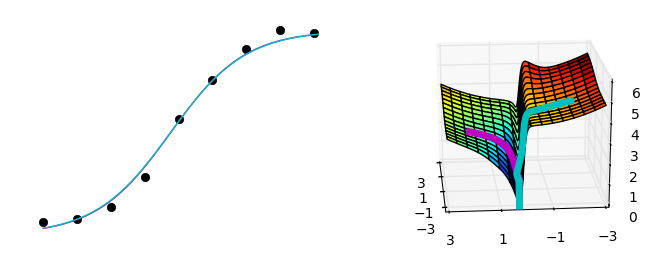

In [6]:
# load dataset
X,y = load_data('bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (8,3))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

# define regularizer parameter
lam = 10**-1

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0,lam)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0,lam)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2,lam)
plt.show()